In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
x_min = -10
x_max = 10

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
x = np.arange(x_min,x_max, 0.1)
y = sigmoid(x)

x_new = np.maximum(x,0)
y_new = np.maximum(2*(sigmoid(x_new) - 0.5), 0)

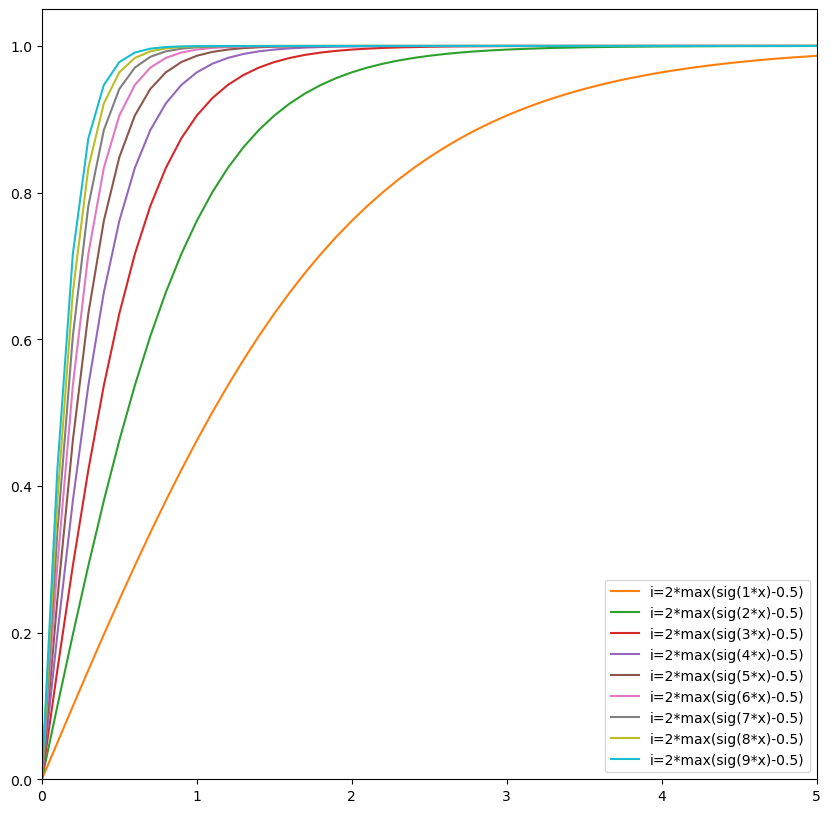

In [5]:
plt.figure(figsize=(10,10))
# plt.plot(x, y, c='blue')
# plt.plot(x_new, y_new, c='red')

x_new = np.maximum(x,0)

for i in range(1,10):
    color = plt.cm.tab10(i)
    y_new = 2*np.maximum((sigmoid(i*x_new)-0.5), 0)
    plt.plot(x_new, y_new, c=color, label=f"i=2*max(sig({i}*x)-0.5)")

# plt.vlines(x=0, ymin=0, ymax=1, colors='k', linestyles='dashed')
# plt.hlines(y=0.5, xmin=-10, xmax=10, colors='k', linestyles='dashed')
# plt.hlines(y=0, xmin=-10, xmax=10, colors='k', linestyles='dashed')
plt.xlim(0,5)
plt.ylim(0)
plt.legend()
plt.show()

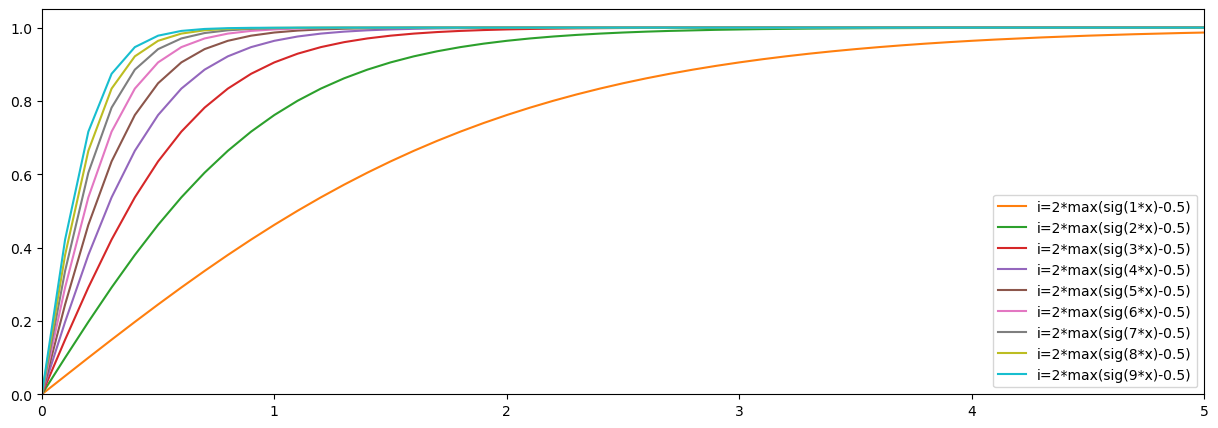

In [6]:
plt.figure(figsize=(15,5))

x_new = np.maximum(x,0)

for i in range(1,10):
    color = plt.cm.tab10(i)
    y_new = 2*(sigmoid(i*x_new)-0.5)
    plt.plot(x_new, y_new, c=color, label=f"i=2*max(sig({i}*x)-0.5)")

plt.xlim(0,5)
plt.ylim(0)
plt.legend()
plt.show()

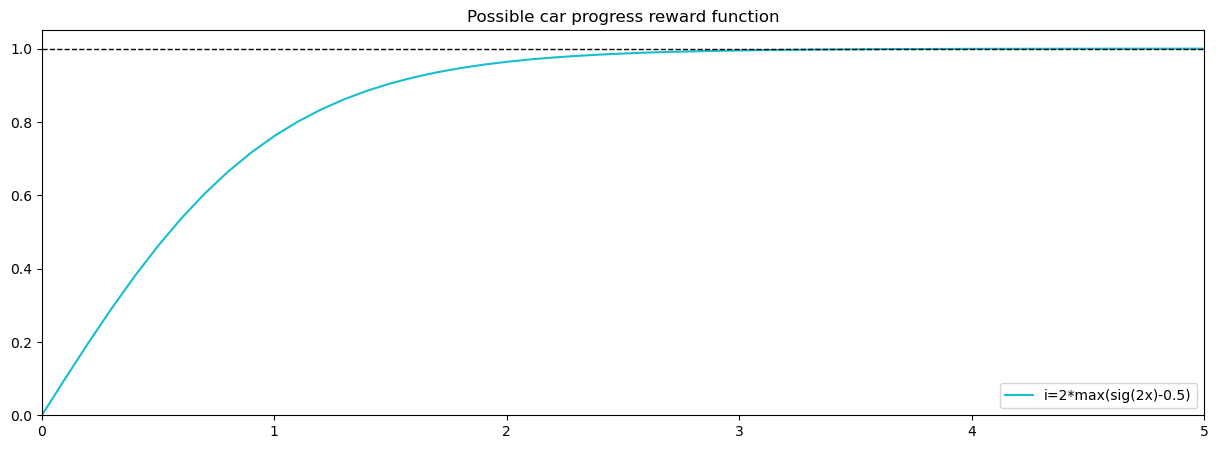

In [7]:
plt.figure(figsize=(15,5))

x_new = np.maximum(x,0)
y_new = 2*(sigmoid(2*x_new)-0.5)

plt.title("Possible car progress reward function")
plt.plot(x_new, y_new, c=color, label=f"i=2*max(sig(2x)-0.5)")

plt.hlines(y=1, xmin=0, xmax=10, colors='k', linestyles='dashed', linewidth=1)
plt.xlim(0,5)
plt.ylim(0)
plt.legend(loc="lower right")
plt.show()

In [8]:
time_steps_per_episode = 500
avg_episode_length = 21.0 # seconds
time_steps_length = avg_episode_length / time_steps_per_episode
print(f"{time_steps_length} seconds per time step")

0.042 seconds per time step


In [9]:
track_distance = 20830.0 # meters
speed_kmh = 275.0 # km/h
speed = speed_kmh * 1000.0 / 3600.0
distance_per_time_step = speed * time_steps_length
print(f"Average speed: {speed:.2f} m/s")
print(f"{distance_per_time_step:.3f} meters in one time step")
meters_per_timestep = (distance_per_time_step / track_distance) * 10000
print(f"{meters_per_timestep:.3f} meters per timestep")

Average speed: 76.39 m/s
3.208 meters in one time step
1.540 meters per timestep


In [10]:
speeds = []
distances = []

for speed_kmh in range(275):
    speed = speed_kmh * 1000.0 / 3600.0
    distance_per_time_step = speed * time_steps_length
    meters_per_timestep = (distance_per_time_step / track_distance) * 10000
    speeds.append(speed_kmh)
    distances.append(meters_per_timestep)

speeds = np.array(speeds)
distances = np.array(distances)


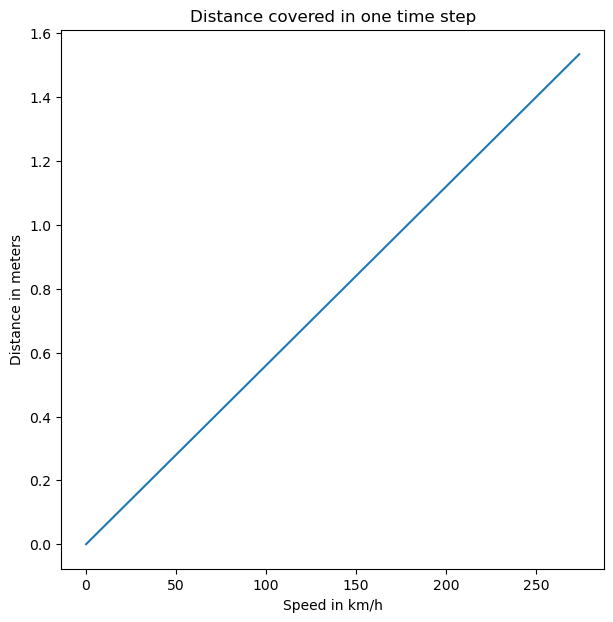

In [11]:
plt.figure(figsize=(7, 7))
plt.title('Distance covered in one time step')
plt.plot(speeds, distances)
plt.xlabel('Speed in km/h')
plt.ylabel('Distance in meters')
plt.show()

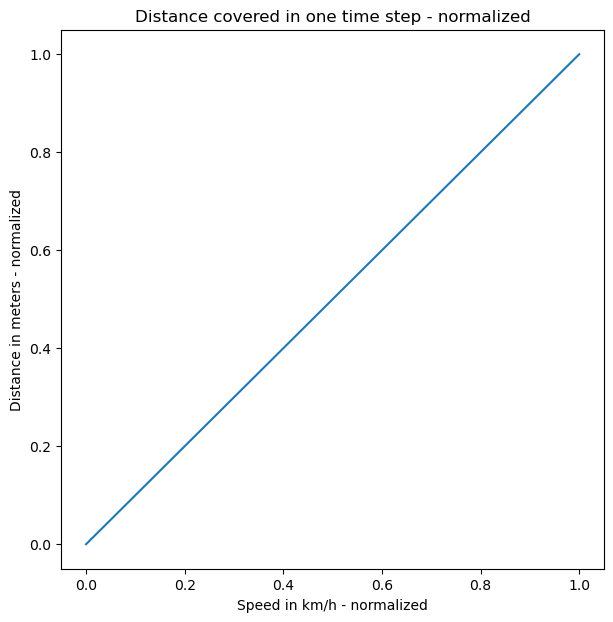

In [12]:
plt.figure(figsize=(7, 7))
plt.title('Distance covered in one time step - normalized')
plt.plot(speeds/max(speeds), distances/max(distances))
plt.xlabel('Speed in km/h - normalized')
plt.ylabel('Distance in meters - normalized')
plt.show()

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def calc_progress_reward(x):
    return 2*(sigmoid(x)-0.5)

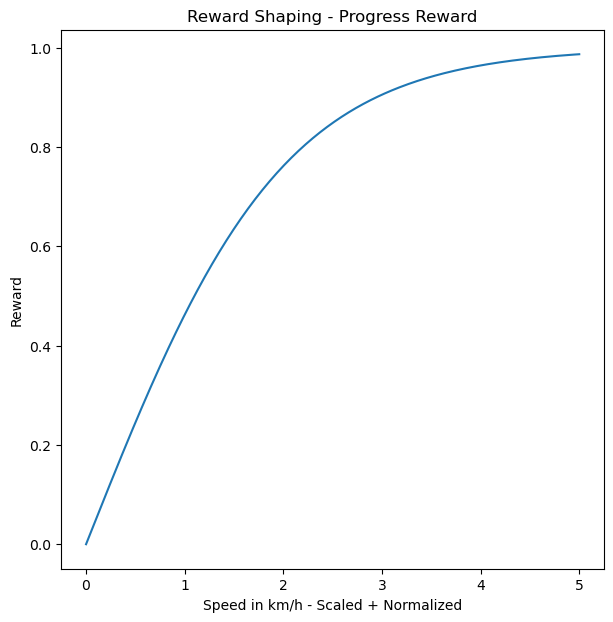

In [15]:
scaled_normalised_speeds = 5*speeds/max(speeds)

plt.figure(figsize=(7, 7))
plt.title('Reward Shaping - Progress Reward')
plt.plot(scaled_normalised_speeds, calc_progress_reward(scaled_normalised_speeds))
plt.xlabel('Speed in km/h - Scaled + Normalized')
plt.ylabel('Reward')
plt.show()

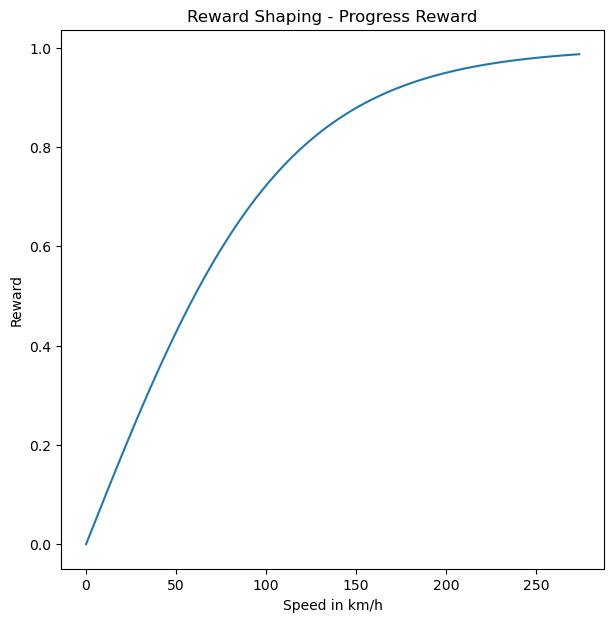

In [16]:
scaled_normalised_speeds = 5*speeds/max(speeds)
progress_reward = calc_progress_reward(scaled_normalised_speeds)

plt.figure(figsize=(7, 7))
plt.title('Reward Shaping - Progress Reward')
plt.plot(speeds, progress_reward)
plt.xlabel('Speed in km/h')
plt.ylabel('Reward')
plt.show()

In [17]:
def off_track_penalty(tyres_off_track):
    return  1 - tyres_off_track/4

In [18]:
def calc_off_track_penalty(tyres_off_track):
    if tyres_off_track == 0:
        return 1
    elif tyres_off_track == 1:
        return 0.75
    elif tyres_off_track == 2:
        return 0.25
    elif tyres_off_track == 3:
        return 0
    else:
        return -1

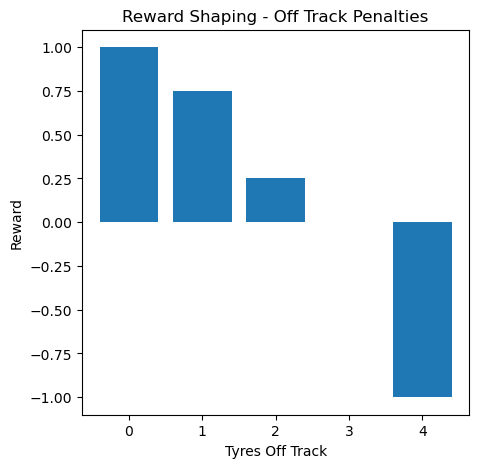

In [19]:
tyres_off_track = np.array([0, 1, 2, 3, 4])
off_track_penalty = [calc_off_track_penalty(tyres) for tyres in tyres_off_track]

plt.figure(figsize=(5, 5))
plt.title('Reward Shaping - Off Track Penalties')
plt.bar(tyres_off_track, off_track_penalty)
plt.xlabel('Tyres Off Track')
plt.ylabel('Reward')
plt.show()

Therefore, the max reward in one timestep is when the car is going at max speed and has all four wheels on track.

In [20]:
max_reward_per_timestep = progress_reward[-1] + calc_off_track_penalty(0)
print(f"Max reward per timestep (On track going full speed): \t{max_reward_per_timestep:5.2f}".rjust(90, ' '))

min_reward_per_timestep = progress_reward[0] + calc_off_track_penalty(4)
print(f"Min reward per timestep (Off track and car is stopped): \t{min_reward_per_timestep:5.2f}".rjust(90, ' '))
print()

corner_reward_per_timestep = progress_reward[60] + calc_off_track_penalty(0)
print(f"Cornering reward per timestep (On track going 60 round a corner - conservative): \t{corner_reward_per_timestep:5.2f}".rjust(90, ' '))

corner_reward_per_timestep = progress_reward[70] + calc_off_track_penalty(1)
print(f"Cornering reward per timestep (On track going 70 round a corner - risky): \t{corner_reward_per_timestep:5.2f}".rjust(90, ' '))

corner_reward_per_timestep = progress_reward[80] + calc_off_track_penalty(2)
print(f"Cornering reward per timestep (On track going 80 round a corner - very risky): \t{corner_reward_per_timestep:5.2f}".rjust(90, ' '))

corner_reward_per_timestep = progress_reward[90] + calc_off_track_penalty(3)
print(f"Cornering reward per timestep (On track going 90 round a corner - cutting): \t{corner_reward_per_timestep:5.2f}".rjust(90, ' '))

corner_reward_per_timestep = progress_reward[100] + calc_off_track_penalty(4)
print(f"Cornering reward per timestep (On track going 100 round a corner - fully cutting): \t{corner_reward_per_timestep:5.2f}".rjust(90, ' '))

                               Max reward per timestep (On track going full speed): 	 1.99
                            Min reward per timestep (Off track and car is stopped): 	-1.00

   Cornering reward per timestep (On track going 60 round a corner - conservative): 	 1.50
          Cornering reward per timestep (On track going 70 round a corner - risky): 	 1.31
     Cornering reward per timestep (On track going 80 round a corner - very risky): 	 0.87
        Cornering reward per timestep (On track going 90 round a corner - cutting): 	 0.68
 Cornering reward per timestep (On track going 100 round a corner - fully cutting): 	-0.28


Car too conservative

***
### Making car less conservative

In [21]:
def calc_off_track_penalty2(tyres_off_track):
    if tyres_off_track >= 3:
        return -1
    else:
        return 1

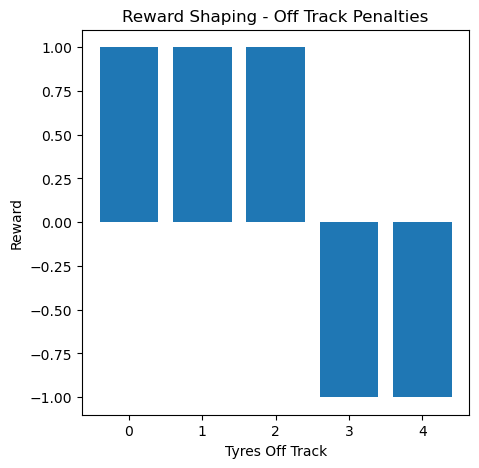

In [22]:
tyres_off_track = np.array([0, 1, 2, 3, 4])
off_track_penalty = [calc_off_track_penalty2(tyres) for tyres in tyres_off_track]

plt.figure(figsize=(5, 5))
plt.title('Reward Shaping - Off Track Penalties')
plt.bar(tyres_off_track, off_track_penalty)
plt.xlabel('Tyres Off Track')
plt.ylabel('Reward')
plt.show()

In [23]:
print("                                                     progress + tyres = reward")
print("On straight:")
max_reward_per_timestep = progress_reward[-1] + calc_off_track_penalty2(0)
print(f"Max reward per timestep (On track going full speed): \t({progress_reward[-1]:.2f})+({calc_off_track_penalty2(0):5.2f})={max_reward_per_timestep:5.2f}")

min_reward_per_timestep = progress_reward[0] + calc_off_track_penalty2(4)
print(f"Min reward per timestep (Off track and car is stopped): ({progress_reward[0]:.2f})+({calc_off_track_penalty2(4):5.2f})={min_reward_per_timestep:5.2f}")
print()

print("Cornering:")
corner_reward_per_timestep = progress_reward[60] + calc_off_track_penalty2(0)
print(f"On track going 60 round a corner (safe): \t\t({progress_reward[60]:.2f})+({calc_off_track_penalty2(0):5.2f})={corner_reward_per_timestep:5.2f}")

corner_reward_per_timestep = progress_reward[70] + calc_off_track_penalty2(1)
print(f"1 wheel going 70 round a corner (risky): \t\t({progress_reward[70]:.2f})+({calc_off_track_penalty2(1):5.2f})={corner_reward_per_timestep:5.2f}")

corner_reward_per_timestep = progress_reward[80] + calc_off_track_penalty2(2)
print(f"2 wheels off going 80 round a corner (very risky): \t({progress_reward[80]:.2f})+({calc_off_track_penalty2(2):5.2f})={corner_reward_per_timestep:5.2f}")

corner_reward_per_timestep = progress_reward[90] + calc_off_track_penalty2(3)
print(f"Off-track going 90 round a corner (cutting): \t\t({progress_reward[90]:.2f})+({calc_off_track_penalty2(3):5.2f})={corner_reward_per_timestep:5.2f}")

corner_reward_per_timestep = progress_reward[100] + calc_off_track_penalty2(4)
print(f"Off-track going 100 round a corner (fully cutting): \t({progress_reward[100]:.2f})+({calc_off_track_penalty2(4):5.2f})={corner_reward_per_timestep:5.2f}")

                                                     progress + tyres = reward
On straight:
Max reward per timestep (On track going full speed): 	(0.99)+( 1.00)= 1.99
Min reward per timestep (Off track and car is stopped): (0.00)+(-1.00)=-1.00

Cornering:
On track going 60 round a corner (safe): 		(0.50)+( 1.00)= 1.50
1 wheel going 70 round a corner (risky): 		(0.56)+( 1.00)= 1.56
2 wheels off going 80 round a corner (very risky): 	(0.62)+( 1.00)= 1.62
Off-track going 90 round a corner (cutting): 		(0.68)+(-1.00)=-0.32
Off-track going 100 round a corner (fully cutting): 	(0.72)+(-1.00)=-0.28


<table>
    <tr>
        <th>Scenario</th>
        <th>Progress</th>
        <th>Off-track</th>
        <th>Wheelslip</th>
        <th>Damage</th>
        <th>Orientation</th>
        <th> = Reward</th>
    </tr>
    <tr>
        <td>Ideal</td>
        <td>0.99</td>
        <td>1.0</td>
        <td>0.0</td>
        <td>0.0</td>
        <td>1.0</td>
        <td>2.99</td>
    </tr>
    <tr>
        <td>Worst Case</td>
        <td>0.0</td>
        <td>-1.0</td>
        <td>-1.0</td>
        <td>-100.0</td>
        <td>-1.0</td>
        <td>-103.0</td>
    </tr>
</table>

***

#### TODO
* Penalise wheel slip, will need to add to normalised telemetry also. Excessive wheel slip on grass is main cause of crashes. (DONE)
* Penalise damage and restart session (hitting wall), may make stopped timer redundant. (DONE)
* Add car orientation reward (DONE)
* Refactor progress reward and off-track penalties (DONE)
* Add dataloader for batching
* Revert to framestack (test grayscale and time between frames) (DONE, time between frames is ok)
* Fix double restart bug (DONE)
* Check if NN takes in previous steering angle + brake/throttle pressure (DONE)
* Adjust max_delta (amount NN can modify steering and brake/throttle) (DONE)
* Test using TCP to update agent rather than threading
* Try doubling progress reward (DONE)
* Try adding mini-batching and increasing buffer size
* Try changing entropy coefficient to zero (DONE)
* Remove LSTM from networks (DONE)
* Remove move squashed guassian from networks (DONE)

Removed max_delta
Doubled progress reward
Changing entropy coefficient to zero
Removed LSTM from networks
Removed squashed guassian from networks

***

In [24]:
from telemetry import TelemetryData
import os
import time
import keyboard
import math
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
from math import pi, radians, degrees, atan2
from heapq import nsmallest

In [25]:
df = pd.read_parquet("../data/track_points.parquet")
df['order'] = df['order'].astype(int)

In [26]:
track_points = [tuple(x) for x in df.values.tolist()]

In [27]:
track_points[:10]

[(0.0, -517.2799682617188, -2350.98876953125),
 (1.0, -528.4847412109375, -2342.195068359375),
 (2.0, -539.8640747070312, -2332.786865234375),
 (3.0, -551.4520874023438, -2322.964111328125),
 (4.0, -563.127685546875, -2312.380615234375),
 (5.0, -574.8121337890625, -2301.233642578125),
 (6.0, -586.3787841796875, -2289.498291015625),
 (7.0, -597.3358154296875, -2277.301025390625),
 (8.0, -607.3389892578125, -2264.826416015625),
 (9.0, -616.56884765625, -2252.3408203125)]

In [28]:
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def get_nearest_points(track_points, position, n=2):
    nearest_points = nsmallest(n, track_points, key=lambda track_point: math.hypot(position[0]-track_point[1], position[1]-track_point[2]))

    point1, point2 = nearest_points
    if point1[0] > point2[0]:
        next_point = point1
        prev_point = point2
    else:
        next_point = point2
        prev_point = point1

    return (prev_point[1], prev_point[2]), (next_point[1], next_point[2])

def get_line_direction_degrees(point1, point2):
    dx, dy = point2[0] - point1[0], point2[1] - point1[1]
    return math.degrees(math.atan2(dy, dx))

def get_difference_in_degrees(car_heading_rad, point1, point2):
    # Convert car heading from radians to degrees
    car_heading_deg = math.degrees(car_heading_rad)

    # Get the direction of the road in degrees
    road_direction_deg = get_line_direction_degrees(point1, point2)

    # Calculate the difference in degrees
    difference = road_direction_deg - car_heading_deg

    # Normalize the difference to the range [-180, 180]
    difference = (difference + 180) % 360 - 180

    return difference

In [66]:
telemetry = TelemetryData()

last_packet_id = 0
prev_rl_suspensionTravel = None
prev_norm_car_position = None


episode_length = 500
episode_number = 1
total_time_steps = 0
episode_time_steps = 1
episode_total_reward = 0
last_episode_reward = 0
print_episode = False

episode_rewards = []

rewards_buffer = []

while True:

    current_fl_suspension = list(telemetry.physics.suspensionTravel)[0]

    if (telemetry.graphics.packetId == last_packet_id) or (prev_rl_suspensionTravel == list(telemetry.physics.suspensionTravel)[0]):
        print("Game is paused")
    else:

        current_norm_position = telemetry.graphics.normalizedCarPosition
        if prev_norm_car_position is None:
            prev_norm_car_position = current_norm_position

        tyres_off_track = telemetry.physics.numberOfTyresOut
        front, rear, left, right, centre = list(telemetry.physics.carDamage)
        car_damage = centre

        ##########################
        
        car_x, car_z, car_y = list(telemetry.graphics.carCoordinates)
        car_y = -1*car_y
        car_heading = correct_heading(telemetry.physics.heading)
        car_coords = (car_x, car_y)
        point1, point2 = get_nearest_points(track_points, car_coords)
        track_direction = get_line_direction_degrees(point1, point2)
        theta = get_difference_in_degrees(car_heading, point1, point2)
        orientation_reward = np.round(np.cos(radians(theta)),2)

        ##########################

        progress = current_norm_position - prev_norm_car_position

        progress_reward = progress * 10_000

        progress_reward_sig = tanh(progress_reward)


        if tyres_off_track == 0:
            on_track_reward = 1
        elif tyres_off_track == 1:
            on_track_reward = 0.75
        elif tyres_off_track == 2:
            on_track_reward = 0.5
        else:
            on_track_reward = -1

        if car_damage > 0:
            car_damage_reward = -1500
        else:
            car_damage_reward = 0

        distance_from_centre_line = 0

        angle_from_centre_line = theta

        total_reward = progress_reward_sig + on_track_reward + car_damage_reward + distance_from_centre_line + orientation_reward

        episode_total_reward += total_reward

        episode_rewards.append(total_reward)

        if not print_episode:
            print(f"Car coordinates: {car_coords}")
            print(f"Car heading: {degrees(car_heading)}")
            print(f"Track Direction: {track_direction}")
            print(f"Nearest points: {point1}, {point2}")
            print(f"Episode: {episode_number}   Timesteps: {episode_time_steps}   Last episode reward: {last_episode_reward:.2f}")
            print("Progress | On Track |  Damage  | Dist to centre | Direction |  Total")
            print(f"{progress_reward_sig:6.2f}   | {on_track_reward:6.2f}   | {car_damage_reward:7.2f} | {distance_from_centre_line:10.2f}     | {orientation_reward:6.2f} | {total_reward:6.1f}")
        else:
            print(f"Episode: {episode_number} | Total Reward: {episode_total_reward}")

        prev_norm_car_position = current_norm_position
        total_time_steps += 1
        episode_time_steps += 1

    if keyboard.is_pressed("q"):
        print("Stopped.")
        break

    # average timestep length
    time.sleep(0.042) # 0.1
    
    

    
    if (total_time_steps % episode_length == 0) or car_damage > 0:
        episode_time_steps = 1
        episode_number += 1
        rewards_buffer.append(episode_rewards)
        episode_rewards = []
        last_episode_reward = episode_total_reward
        if print_episode:
            print(f"Episode: {episode_number} | Total Reward: {episode_total_reward}")
        if car_damage > 0:
            print("Car damage detected!")
            break
        episode_total_reward = 0

    if not print_episode:
        clear_output(wait=True)

telemetry.close()

Car coordinates: (-2511.20947265625, -160.7989044189453)
Car heading: 163.6786867378861
Track Direction: 153.86833476893818
Nearest points: (-2510.925537109375, -163.9869232177734), (-2523.387451171875, -157.8733520507812)
Episode: 1   Timesteps: 51   Last episode reward: 0.00
Progress | On Track |  Damage  | Dist to centre | Direction |  Total
  0.00   |   1.00   |    0.00 |       0.00     |   0.99 |    2.0
Stopped.


***

In [30]:
x_coords = [track_point[1] for track_point in track_points]
y_coords = [track_point[2] for track_point in track_points]

In [63]:
def correct_heading(heading):
    flipped_heading = heading * -1
    corrected_heading = flipped_heading - math.pi/2
    if corrected_heading < -math.pi:
        corrected_heading += 2*math.pi
    elif corrected_heading > math.pi:
        corrected_heading -= 2*math.pi
    return corrected_heading

def get_nearest_points(track_points, position, n=2):
    nearest_points = nsmallest(n, track_points, key=lambda track_point: math.hypot(position[0]-track_point[1], position[1]-track_point[2]))

    point1, point2 = nearest_points
    if point1[0] > point2[0]:
        next_point = point1
        prev_point = point2
    else:
        next_point = point2
        prev_point = point1

    return (prev_point[1], prev_point[2]), (next_point[1], next_point[2])

def get_track_direction(point1, point2):
    
    x1, y1 = point1
    x2, y2 = point2

    # Calculate the differences
    dx = x2 - x1
    dy = y2 - y1

    # Calculate the direction in radians
    direction = math.atan2(dy, dx)
    
    return degrees(direction)

def get_degrees_between_lines(car_heading, A, B):
    # Convert line representations to vectors
    V1 = (math.cos(car_heading), math.sin(car_heading))
    V2 = (B[0] - A[0], B[1] - A[1])

    # Calculate dot product
    dot_product = V1[0]*V2[0] + V1[1]*V2[1]

    # Calculate magnitudes
    magnitude_V1 = math.sqrt(V1[0]**2 + V1[1]**2)
    magnitude_V2 = math.sqrt(V2[0]**2 + V2[1]**2)

    # Calculate and return angle in degrees
    cos_alpha = dot_product / (magnitude_V1 * magnitude_V2)
    alpha_rad = math.acos(cos_alpha)
    # alpha_deg = alpha_rad * 180 / math.pi
    return alpha_rad

def get_line_direction_degrees(point1, point2):
    dx, dy = point2[0] - point1[0], point2[1] - point1[1]
    return math.degrees(math.atan2(dy, dx))

def get_difference_in_degrees(car_heading_rad, point1, point2):
    # Convert car heading from radians to degrees
    car_heading_deg = math.degrees(car_heading_rad)

    # Get the direction of the road in degrees
    road_direction_deg = get_line_direction_degrees(point1, point2)

    # Calculate the difference in degrees
    difference = road_direction_deg - car_heading_deg

    # Normalize the difference to the range [-180, 180]
    difference = (difference + 180) % 360 - 180

    return difference

Stopped.


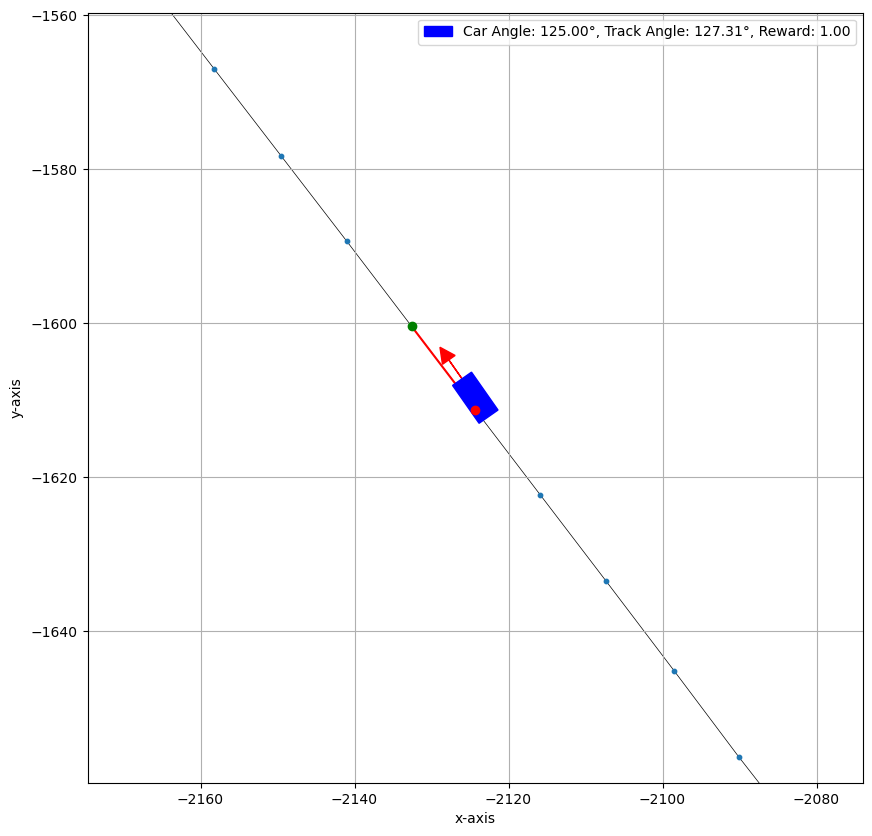

In [48]:
car_length, car_width = 6, 3
arrow_length = 6
reward = 0.0
zoom = 50

telemetry = TelemetryData()

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Car Orientation Testing", fontsize=20, pad=10)

while True:

    car_x, car_z, car_y = list(telemetry.graphics.carCoordinates)
    car_y = -1*car_y
    car_coords = (car_x, car_y)
    car_heading = correct_heading(telemetry.physics.heading)

    point1, point2 = get_nearest_points(track_points, car_coords)

    theta = get_difference_in_degrees(car_heading, point1, point2)
    reward = np.round(np.cos(radians(theta)),2)

    road_direction_deg = get_line_direction_degrees(point1, point2)

    ax.cla()
    ax.scatter(point1[0], point1[1], c='red', zorder=10)
    ax.scatter(point2[0], point2[1], c='green', zorder=10)
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], c='red')

    arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), car_coords[1] + arrow_length * math.sin(car_heading))
    rect = patches.Rectangle((- car_length/2, - car_width/2), car_length, car_width, color='blue', label=f'Car Angle: {degrees(car_heading):.2f}°, Track Angle: {road_direction_deg:.2f}°, Reward: {reward:.2f}', zorder=3)
    rot_trans = transforms.Affine2D().rotate_deg(degrees(car_heading)).translate(car_coords[0], car_coords[1])
    rect.set_transform(rot_trans + ax.transData)
    ax.add_patch(rect)
    ax.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
    head_width=2, head_length=2, fc='red', ec='red')

    ax.scatter(x_coords, y_coords, s=10, zorder=1)
    ax.plot(x_coords, y_coords, linewidth=0.5, color='black', zorder=0)

    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis", labelpad=5)
    ax.axis('equal')
    ax.grid()
    ax.legend()
    
    # zoom in start/finish line
    # plt.xlim(-1000, 0)
    # plt.ylim(-2500, -2000)

    # zoom in on carousel
    # plt.xlim(1900, 2500)
    # plt.ylim(1400, 1600)

    # zoom in on current car location
    ax.set_xlim(car_coords[0]-zoom, car_coords[0]+zoom)
    ax.set_ylim(car_coords[1]-zoom, car_coords[1]+zoom)

    if keyboard.is_pressed("q"):
        print("Stopped.")
        break

    display(fig)
    clear_output(wait = True)
    # plt.pause(0.1)

telemetry.close()

In [55]:
from matplotlib.animation import FuncAnimation
from PIL import Image
import io

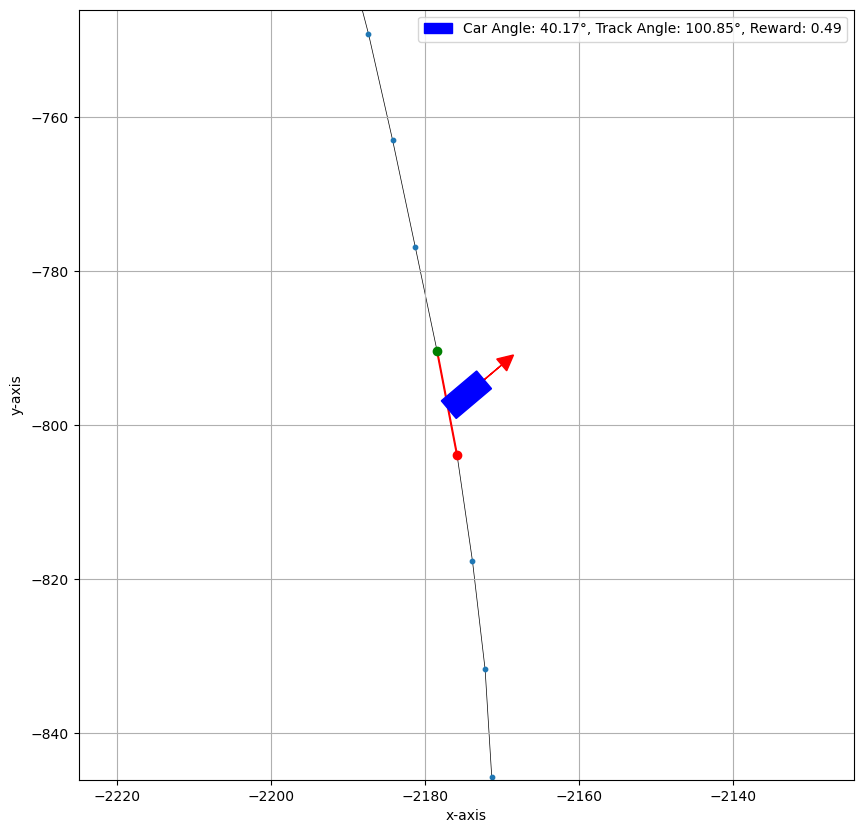

In [61]:
car_length, car_width = 6, 3
arrow_length = 6
reward = 0.0
zoom = 50

telemetry = TelemetryData()

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Car Orientation Testing", fontsize=20, pad=10)

def update(num):

    ax.cla()
    car_x, car_z, car_y = list(telemetry.graphics.carCoordinates)
    car_y = -1*car_y
    car_coords = (car_x, car_y)
    car_heading = correct_heading(telemetry.physics.heading)
    point1, point2 = get_nearest_points(track_points, car_coords)
    theta = get_difference_in_degrees(car_heading, point1, point2)
    reward = np.round(np.cos(radians(theta)),2)

    road_direction_deg = get_line_direction_degrees(point1, point2)

    ax.scatter(point1[0], point1[1], c='red', zorder=10)
    ax.scatter(point2[0], point2[1], c='green', zorder=10)
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], c='red')

    arrow_end = (car_coords[0] + arrow_length * math.cos(car_heading), car_coords[1] + arrow_length * math.sin(car_heading))
    rect = patches.Rectangle((- car_length/2, - car_width/2), car_length, car_width, color='blue', label=f'Car Angle: {degrees(car_heading):.2f}°, Track Angle: {road_direction_deg:.2f}°, Reward: {reward:.2f}', zorder=3)
    rot_trans = transforms.Affine2D().rotate_deg(degrees(car_heading)).translate(car_coords[0], car_coords[1])
    rect.set_transform(rot_trans + ax.transData)
    ax.add_patch(rect)
    ax.arrow(car_coords[0], car_coords[1], arrow_end[0] - car_coords[0], arrow_end[1] - car_coords[1],
    head_width=2, head_length=2, fc='red', ec='red')

    ax.scatter(x_coords, y_coords, s=10, zorder=1)
    ax.plot(x_coords, y_coords, linewidth=0.5, color='black', zorder=0)

    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis", labelpad=5)
    ax.axis('equal')
    ax.grid()
    ax.legend()
    
    # zoom in on current car location
    ax.set_xlim(car_coords[0]-zoom, car_coords[0]+zoom)
    ax.set_ylim(car_coords[1]-zoom, car_coords[1]+zoom)


ani = FuncAnimation(fig, update, frames=range(120), repeat=False)
ani.save('filename.gif', writer='pillow', fps=10)

***

In [13]:
episode_number = 0
for episode in rewards_buffer:
    print(f"Episode: {episode_number}")
    reward_traj = np.array(episode)
    print(np.round(reward_traj[:5],2))
    print(np.round(reward_traj[-5:],2))
    print(reward_traj.shape)
    print(f"{np.sum(reward_traj):.2f}")
    print(f"{np.mean(reward_traj):.2f}")
    print()
    episode_number += 1

Episode: 0
[1. 1. 1. 1. 1.]
[1.72 1.72 1.72 1.72 1.69]
(499,)
797.34
1.60

Episode: 1
[1.72 1.62 1.79 1.72 1.58]
[1.78 1.87 1.81 1.81 1.78]
(500,)
818.42
1.64

Episode: 2
[1.81 1.81 1.81 1.82 1.69]
[1.85 1.94 1.92 1.9  1.92]
(500,)
931.34
1.86

Episode: 3
[1.92 1.92 1.92 1.92 1.88]
[ 1.51000e+00  1.18000e+00  1.04000e+00 -3.30000e-01 -1.50032e+03]
(371,)
-847.91
-2.29



In [20]:
good_traj = rewards_buffer[-2]
crash_traj = rewards_buffer[-1]

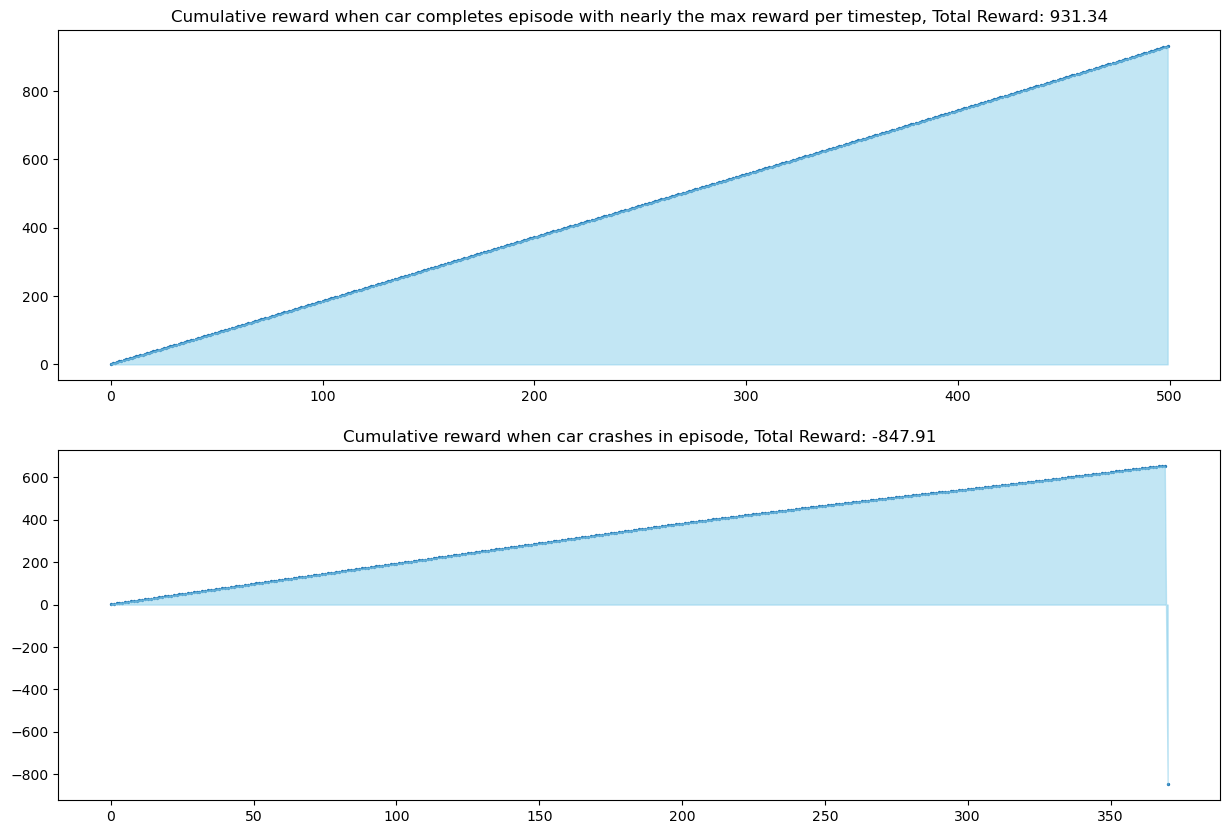

In [91]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

xs = np.arange(0, len(good_traj))
ys = np.array(good_traj)
ys = np.cumsum(ys)

# title
axs[0].set_title(f"Cumulative reward when car completes episode with nearly the max reward per timestep, Total Reward: {ys[-1]:.2f}")
axs[0].scatter(xs, ys, s=2)
axs[0].fill_between(xs, ys, color="skyblue", alpha=0.5)

xs = np.arange(0, len(crash_traj))
ys = np.array(crash_traj)
ys = np.cumsum(ys)

axs[1].set_title(f"Cumulative reward when car crashes in episode, Total Reward: {ys[-1]:.2f}")
axs[1].scatter(xs, ys, s=2)
axs[1].fill_between(xs, ys, color="skyblue", alpha=0.5)

plt.show()

In [94]:
gamma = 0.99
episode_length = 500

In [95]:
for traj in rewards_buffer:
    reversed_traj = traj[::-1]
    discounted_reward = 0
    for i, reward in enumerate(reversed_traj):
        discounted_reward += (gamma**i) * reward
    print(f"Episode length: {len(traj)} \t Discounted reward:{discounted_reward:.2f}")

Episode length: 499 	 Discounted reward:175.82
Episode length: 500 	 Discounted reward:167.05
Episode length: 500 	 Discounted reward:187.41
Episode length: 371 	 Discounted reward:-1343.23


***
### Wheel slip penalty

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel("../data/wheelslip_20230804_211117.xlsx")

In [18]:
df.head()

,timestamps,x_coords,y_coords,z_coords,gears,speeds,headings,normalizedCarPositions,wheels_off_track,off_track,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip,fl_suspension_travel,fr_suspension_travel,rl_suspension_travel,rr_suspension_travel
0,2023-08-04 21:09:50.255,-630.860229,-2236.068359,146.914017,1,0.000592,2.520588,0.007855,0,0,0.080984,0.060698,0.067496,0.073021,0.075712,0.078559,0.097778,0.092525
1,2023-08-04 21:09:50.519,-630.860229,-2236.068359,146.914017,1,0.000556,2.520575,0.007855,0,0,0.080916,0.060580,0.067520,0.073008,0.075695,0.078544,0.097777,0.092511
2,2023-08-04 21:09:50.620,-630.860229,-2236.068359,146.914017,1,0.000199,2.520569,0.007855,0,0,0.080694,0.060909,0.067461,0.072983,0.075711,0.078548,0.097777,0.092511
3,2023-08-04 21:09:50.721,-630.860291,-2236.068359,146.914017,1,0.001417,2.520565,0.007855,0,0,0.078686,0.062895,0.065598,0.074941,0.075734,0.078526,0.097815,0.092489
4,2023-08-04 21:09:50.822,-630.860291,-2236.068359,146.914017,1,0.001529,2.520566,0.007855,0,0,0.078328,0.063384,0.065641,0.075001,0.075796,0.078450,0.097894,0.092400


In [5]:
fl_wheel_slip = df["fl_wheel_slip"]
fr_wheel_slip = df["fr_wheel_slip"]
rl_wheel_slip = df["rl_wheel_slip"]
rr_wheel_slip = df["rr_wheel_slip"]

<Axes: ylabel='Density'>

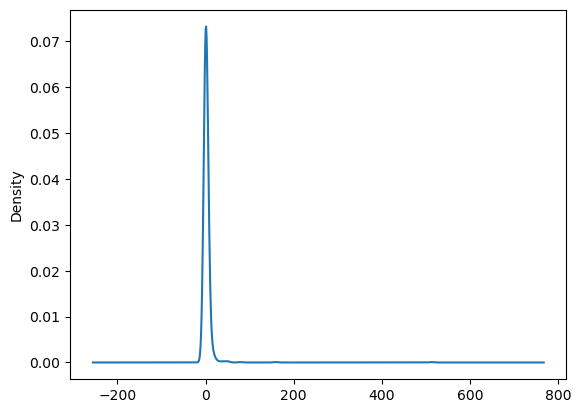

In [6]:
fl_wheel_slip.plot.kde()

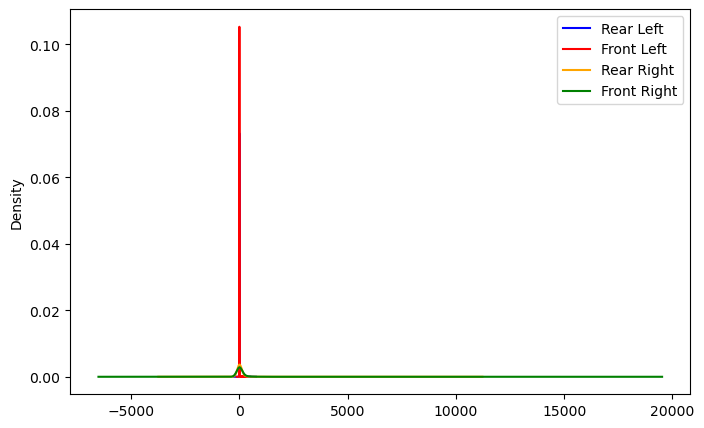

In [11]:
# plt.figure(figsize=(15,15))
plt.figure(figsize=(8, 5))
fl_wheel_slip.plot.kde(color='blue', label="Rear Left")
fr_wheel_slip.plot.kde(color='red', label="Front Left")
rl_wheel_slip.plot.kde(color='orange', label="Rear Right")
rr_wheel_slip.plot.kde(color='green', label="Front Right")
# plt.xlim(-2.5, 2.5)
plt.legend()
plt.show()

<Axes: >

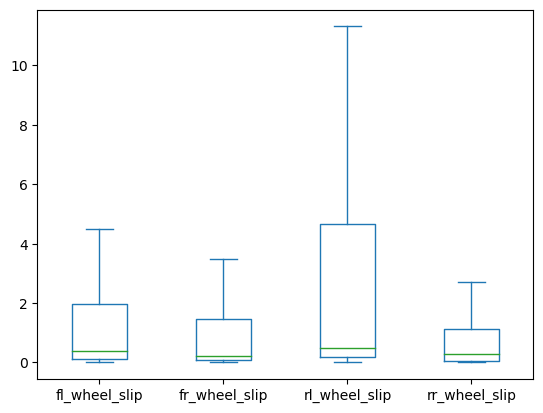

In [17]:
df[["fl_wheel_slip","fr_wheel_slip","rl_wheel_slip","rr_wheel_slip"]].plot.box(showfliers=False)

(0.0, 10.0)

<Figure size 1000x700 with 0 Axes>

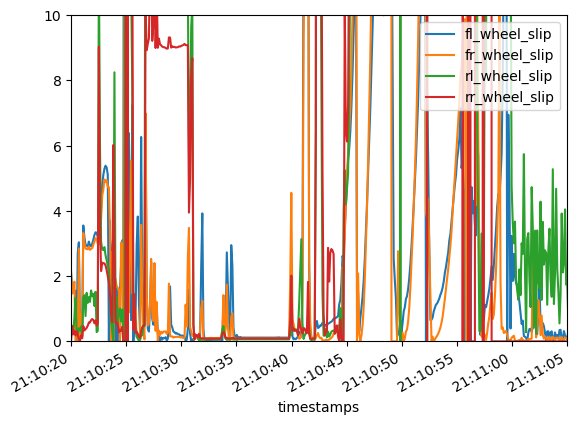

In [54]:
plt.figure(figsize=(10, 7))
df.plot(x='timestamps', y=['fl_wheel_slip','fr_wheel_slip','rl_wheel_slip','rr_wheel_slip'])
plt.xlim('2023-08-04 21:10:20','2023-08-04 21:11:05')
plt.ylim(0,10)

(19573.88222016204, 19573.882266597222)

<Figure size 1000x700 with 0 Axes>

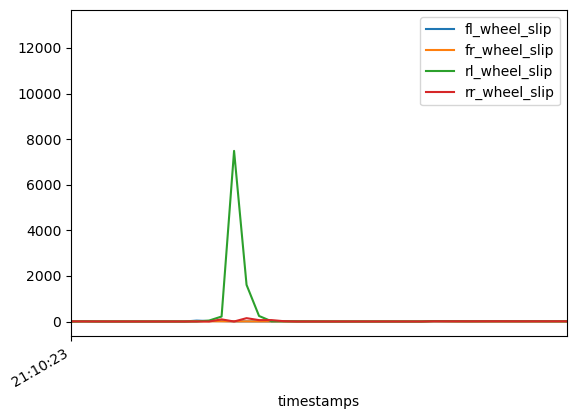

In [30]:
plt.figure(figsize=(10, 7))
df.plot(x='timestamps', y=['fl_wheel_slip','fr_wheel_slip','rl_wheel_slip','rr_wheel_slip'])
plt.xlim('2023-08-04 21:10:23.822','2023-08-04 21:10:27.834')

(19573.882476851853, 19573.882532800926)

<Figure size 1000x700 with 0 Axes>

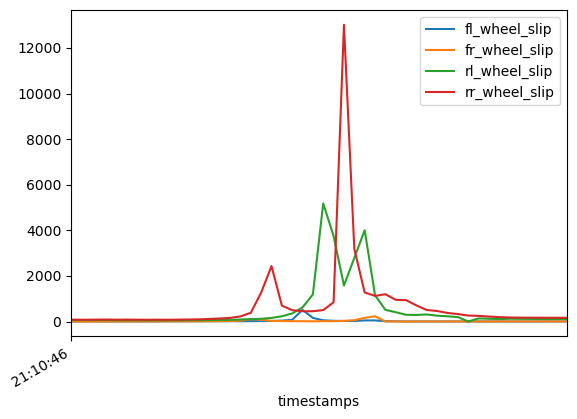

In [35]:
plt.figure(figsize=(10, 7))
df.plot(x='timestamps', y=['fl_wheel_slip','fr_wheel_slip','rl_wheel_slip','rr_wheel_slip'])
plt.xlim('2023-08-04 21:10:46','2023-08-04 21:10:50.834')

In [40]:
FL_WS_MEAN = 1.3648
FL_WS_STD = 34.1651

FR_WS_MEAN = 0.9597
FR_WS_STD = 6.8757

RL_WS_MEAN = 1.4626
RL_WS_STD = 44.9431

RR_WS_MEAN = 0.7643
RR_WS_STD = 3.5982

In [46]:
fl_wheel_slip_norm = np.clip((fl_wheel_slip - FL_WS_MEAN) / FL_WS_STD, -2, 2)
fr_wheel_slip_norm = np.clip((fr_wheel_slip - FR_WS_MEAN) / FR_WS_STD, -2, 2)
rr_wheel_slip_norm = np.clip((rr_wheel_slip - RR_WS_MEAN) / RR_WS_STD, -2, 2)
rl_wheel_slip_norm = np.clip((rl_wheel_slip - RL_WS_MEAN) / RL_WS_STD, -2, 2)

In [47]:
df['fl_wheel_slip_norm'] = fl_wheel_slip_norm
df['fr_wheel_slip_norm'] = fr_wheel_slip_norm
df['rr_wheel_slip_norm'] = rr_wheel_slip_norm
df['rl_wheel_slip_norm'] = rl_wheel_slip_norm

<Axes: xlabel='timestamps'>

<Figure size 1000x700 with 0 Axes>

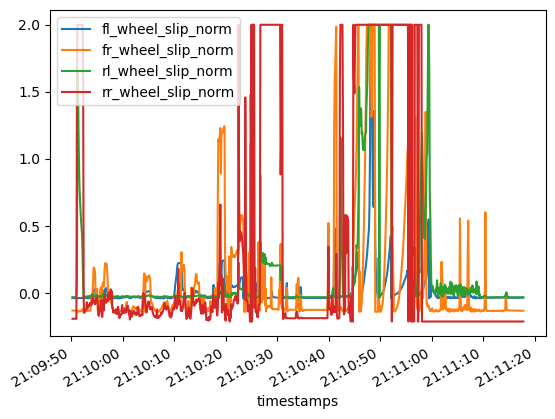

In [48]:
plt.figure(figsize=(10, 7))
df.plot(x='timestamps', y=['fl_wheel_slip_norm','fr_wheel_slip_norm','rl_wheel_slip_norm','rr_wheel_slip_norm'])
# plt.xlim('2023-08-04 21:10:23.822','2023-08-04 21:10:27.834')

(19573.882476851853, 19573.882532800926)

<Figure size 1000x700 with 0 Axes>

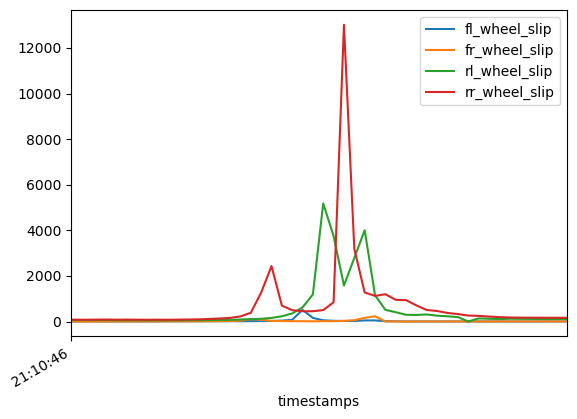

In [49]:
plt.figure(figsize=(10, 7))
df.plot(x='timestamps', y=['fl_wheel_slip','fr_wheel_slip','rl_wheel_slip','rr_wheel_slip'])
plt.xlim('2023-08-04 21:10:46','2023-08-04 21:10:50.834')

In [55]:
controlled_stop_df = pd.read_excel("../data/wheelslip_20230804_213741.xlsx")
locked_df = pd.read_excel("../data/wheelslip_20230804_214003.xlsx")

<Axes: xlabel='timestamps'>

<Figure size 1000x700 with 0 Axes>

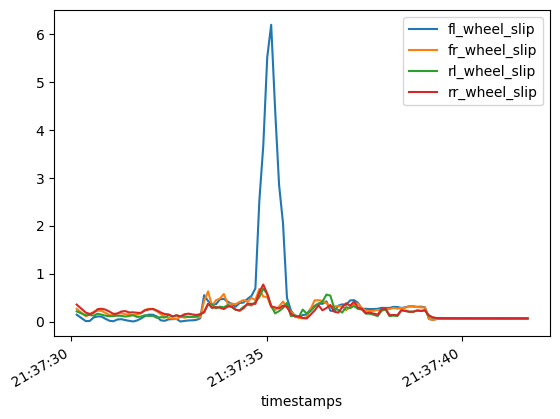

In [56]:
plt.figure(figsize=(10, 7))
controlled_stop_df.plot(x='timestamps', y=['fl_wheel_slip','fr_wheel_slip','rl_wheel_slip','rr_wheel_slip'])

In [77]:
controlled_stop_df['fl_wheel_slip_tan'] = np.tanh(controlled_stop_df['fl_wheel_slip'])
controlled_stop_df['fr_wheel_slip_tan'] = np.tanh(controlled_stop_df['fr_wheel_slip'])
controlled_stop_df['rl_wheel_slip_tan'] = np.tanh(controlled_stop_df['rl_wheel_slip'])
controlled_stop_df['rr_wheel_slip_tan'] = np.tanh(controlled_stop_df['rr_wheel_slip'])

<Axes: xlabel='timestamps'>

<Figure size 1000x700 with 0 Axes>

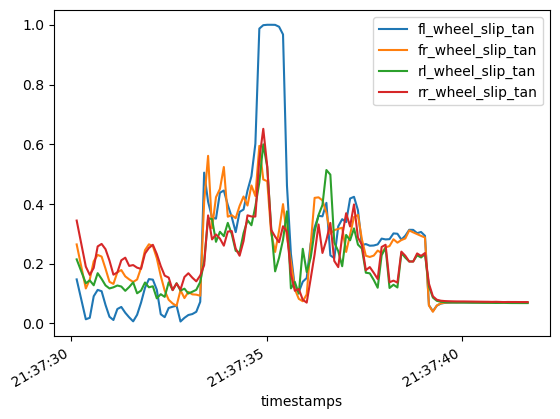

In [78]:
plt.figure(figsize=(10, 7))
controlled_stop_df.plot(x='timestamps', y=['fl_wheel_slip_tan','fr_wheel_slip_tan','rl_wheel_slip_tan','rr_wheel_slip_tan'])

########

<Axes: xlabel='timestamps'>

<Figure size 1000x700 with 0 Axes>

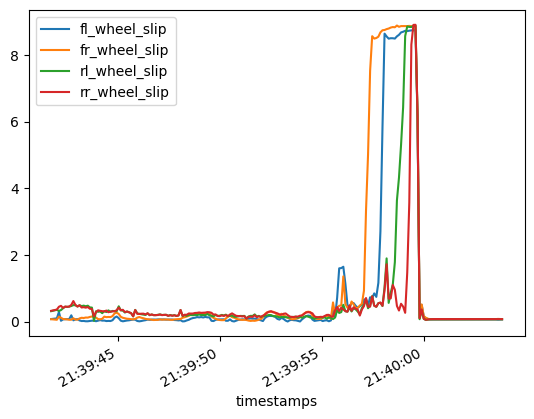

In [57]:
plt.figure(figsize=(10, 7))
locked_df.plot(x='timestamps', y=['fl_wheel_slip','fr_wheel_slip','rl_wheel_slip','rr_wheel_slip'])

In [73]:
locked_df['fl_wheel_slip_tan'] = np.tanh(locked_df['fl_wheel_slip'])
locked_df['fr_wheel_slip_tan'] = np.tanh(locked_df['fr_wheel_slip'])
locked_df['rl_wheel_slip_tan'] = np.tanh(locked_df['rl_wheel_slip'])
locked_df['rr_wheel_slip_tan'] = np.tanh(locked_df['rr_wheel_slip'])

In [74]:
print(locked_df['fl_wheel_slip'].min())
print(locked_df['fr_wheel_slip'].min())
print(locked_df['rl_wheel_slip'].min())
print(locked_df['rr_wheel_slip'].min())

0.00407442357391119
0.02241607196629047
0.0239467415958643
0.05539066344499588


In [75]:
locked_df.loc[locked_df['fl_wheel_slip_tan']<-20][['fl_wheel_slip','fl_wheel_slip_tan']]

,fl_wheel_slip,fl_wheel_slip_tan


<Axes: xlabel='timestamps'>

<Figure size 1000x700 with 0 Axes>

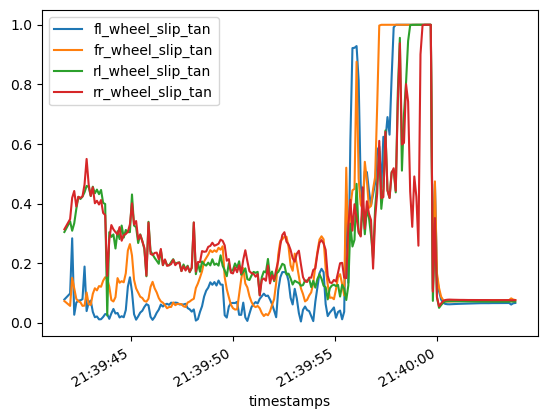

In [76]:
plt.figure(figsize=(10, 7))
locked_df.plot(x='timestamps', y=['fl_wheel_slip_tan','fr_wheel_slip_tan','rl_wheel_slip_tan','rr_wheel_slip_tan'])